First 10 samples:
   age     sex steroid  antivirals fatigue malaise anorexia liver_big  \
0   30    male   False       False   False   False    False     False   
1   50  female   False       False    True   False    False     False   
2   78  female    True       False    True   False    False      True   
3   31  female     NaN        True   False   False    False      True   
4   34  female    True       False   False   False    False      True   
5   34  female    True       False   False   False    False      True   
6   51  female   False       False    True   False     True      True   
7   23  female    True       False   False   False    False      True   
8   39  female    True       False    True   False    False      True   
9   30  female    True       False   False   False    False      True   

  liver_firm spleen_palpable spiders ascites varices  bilirubin  \
0      False           False   False   False   False        1.0   
1      False           False   False   False

C:\Users\user\AppData\Local\Temp\ipykernel_2676\259227165.py:62: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].fillna(data[column].mode()[0])


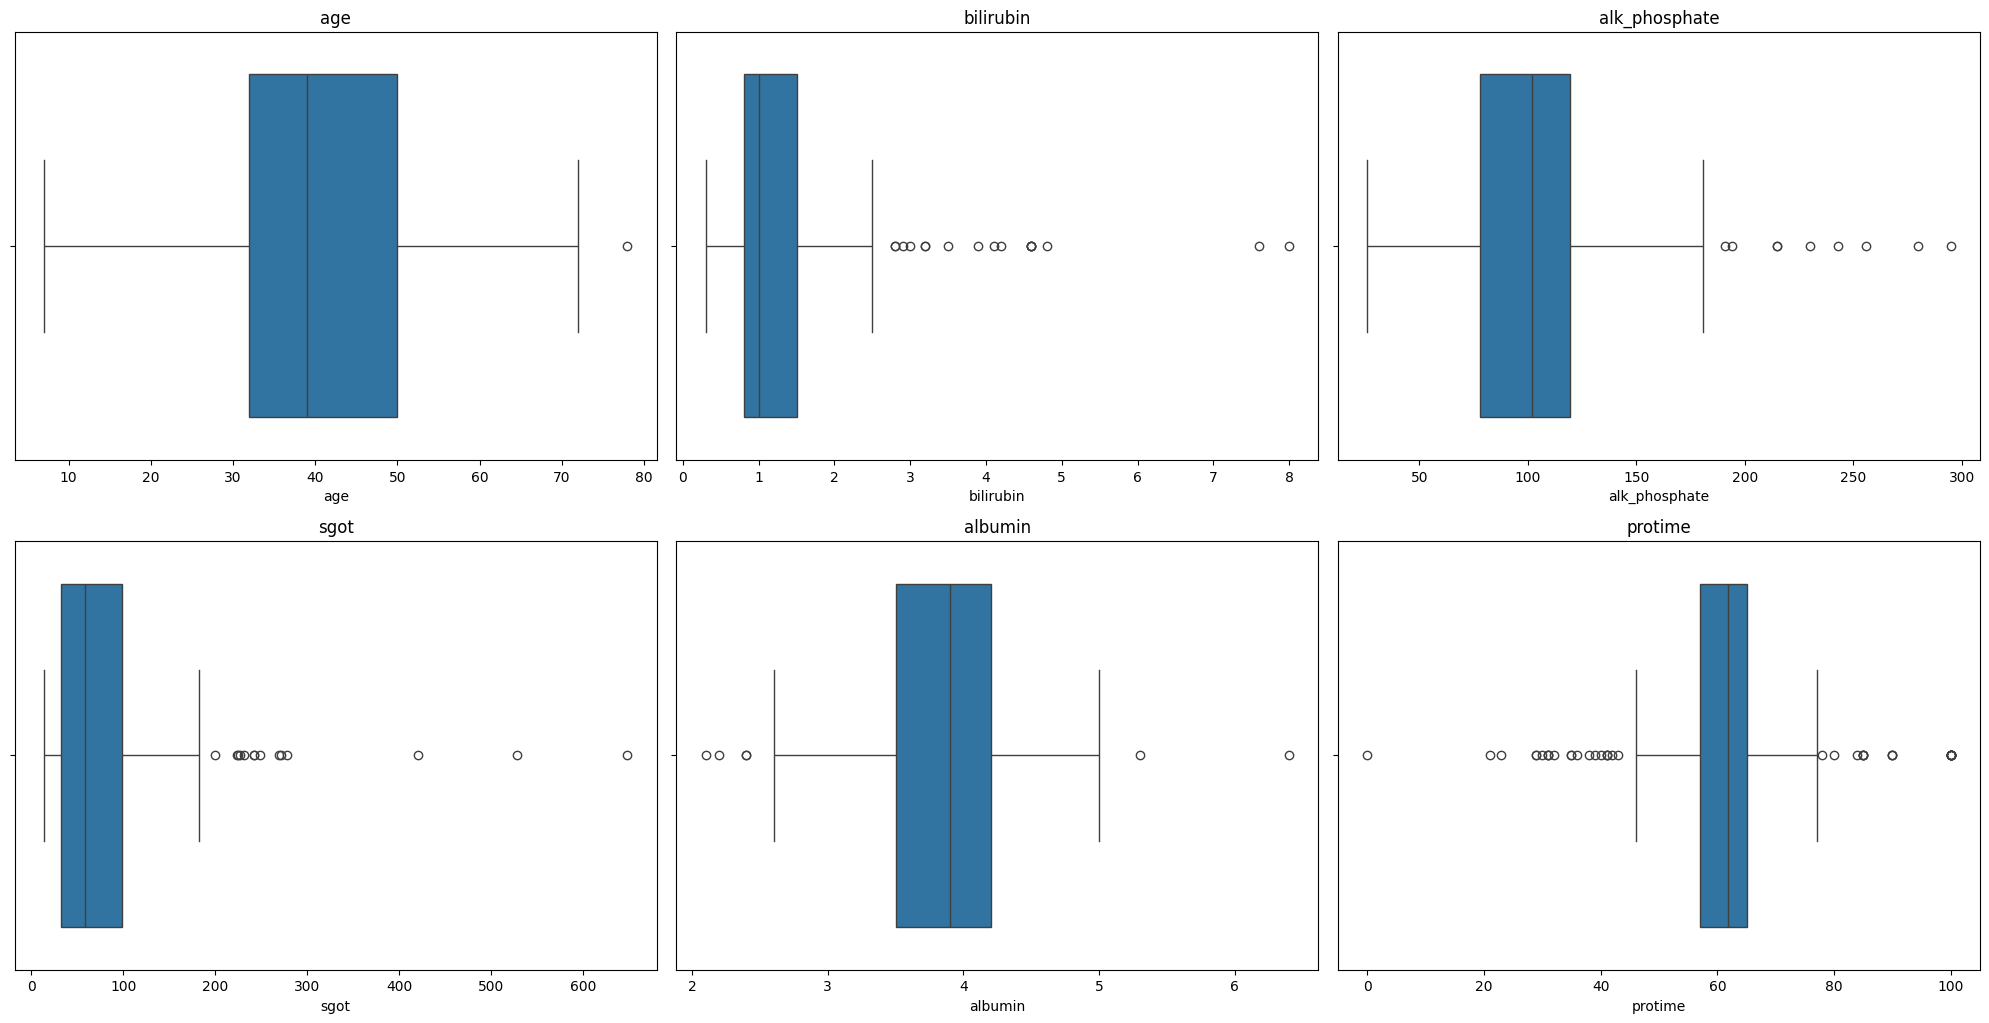

##################################################


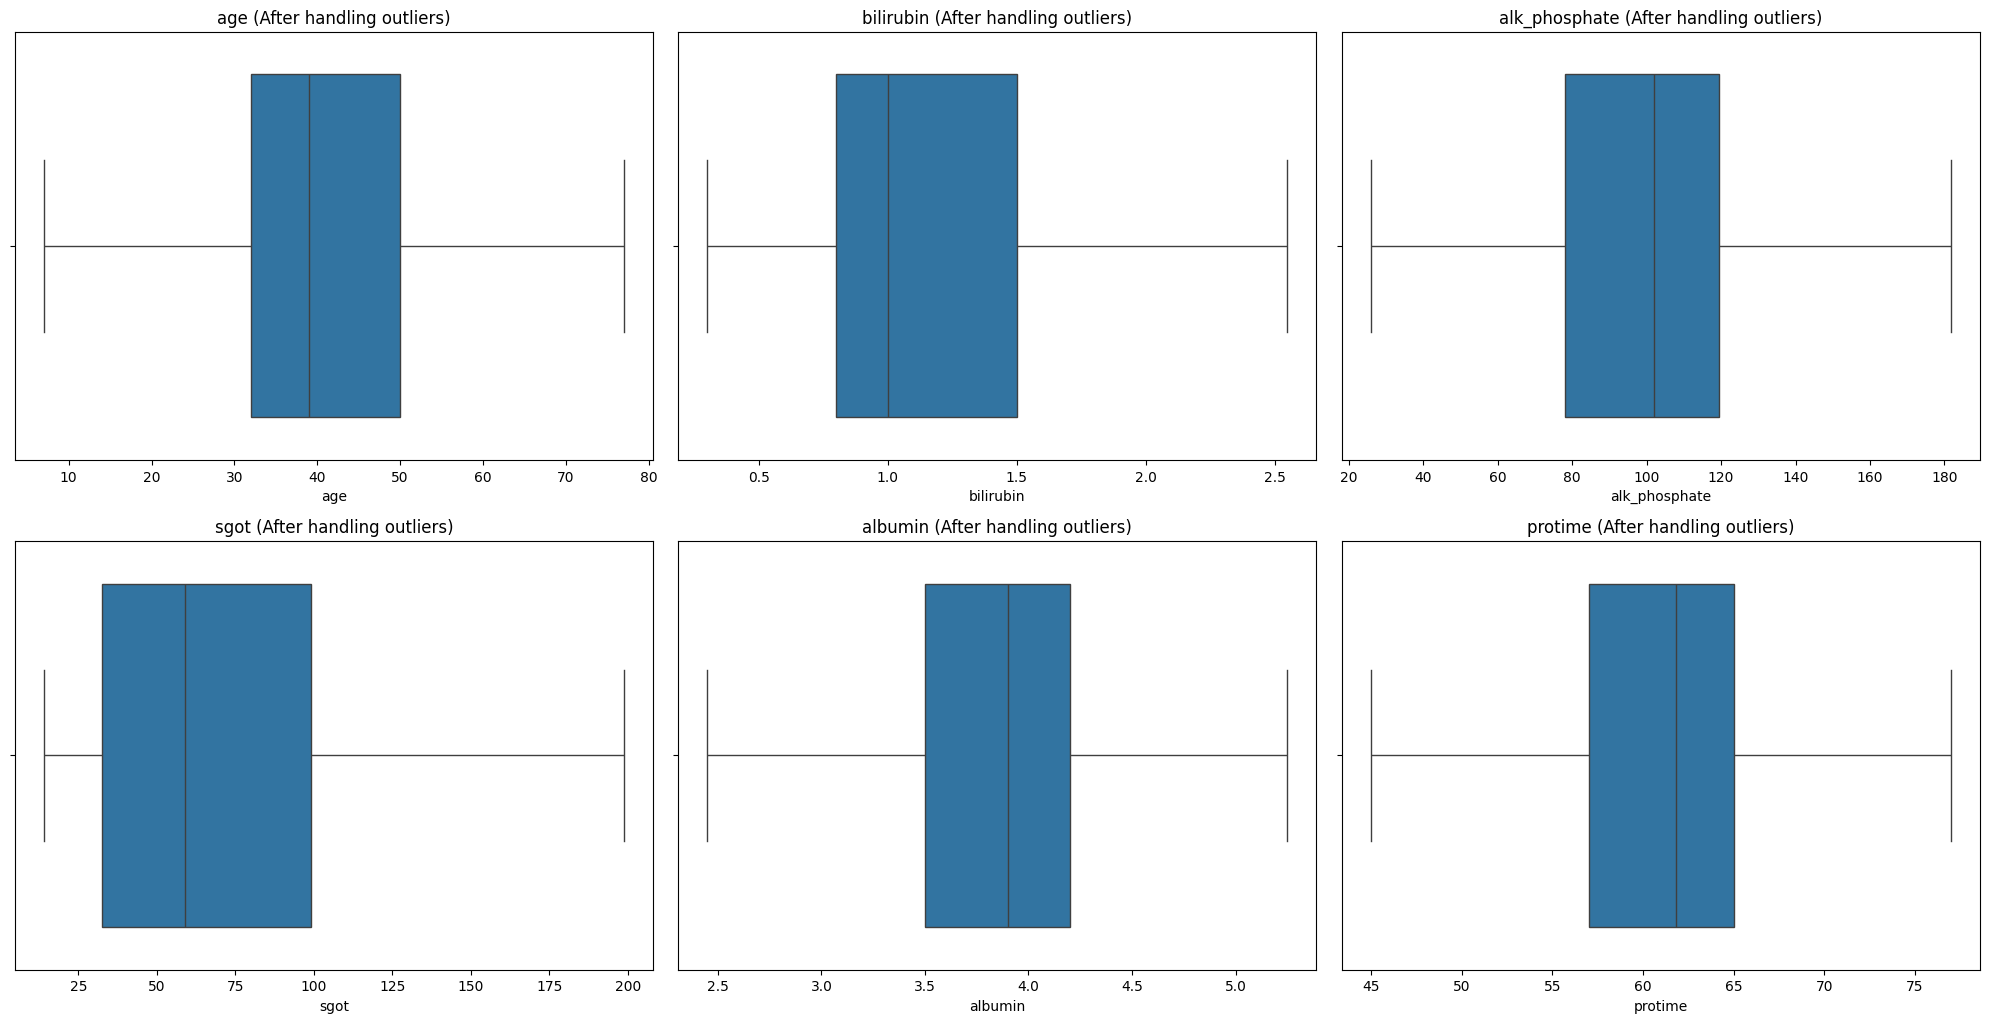

              age   bilirubin  alk_phosphate        sgot    albumin  \
count  155.000000  155.000000     155.000000  155.000000  155.00000   
mean    41.193548    1.240097     102.207655   76.400491    3.81404   
std     12.547104    0.627166      37.774671   55.504568    0.57946   
min      7.000000    0.300000      26.000000   14.000000    2.45000   
25%     32.000000    0.800000      78.000000   32.500000    3.50000   
50%     39.000000    1.000000     102.000000   59.000000    3.90000   
75%     50.000000    1.500000     119.500000   99.000000    4.20000   
max     77.000000    2.550000     181.750000  198.750000    5.25000   

          protime  
count  155.000000  
mean    61.349047  
std      9.870191  
min     45.000000  
25%     57.000000  
50%     61.852273  
75%     65.000000  
max     77.000000  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\user\Downloads\Telegram Desktop\hepatitis.csv")  


print("First 10 samples:")
print(data.head(10))

print("\n3 random samples:")
print(data.sample(3))

print("\nLast 5 samples:")
print(data.tail(5))

print("Missing values:")
data.replace('?', np.nan, inplace=True)
column_info = pd.DataFrame({
    # "Columns": data.columns,
    "Feature Type": data.dtypes,     
    "Missing Values": data.isnull().sum()     
})

print(column_info)

print("Data types:")
column_infos = pd.DataFrame({
    "Type": data.dtypes
})
print(column_infos)

2

data.replace('?', np.nan, inplace=True)
missing_sample_indices = data[data.isnull().any(axis=1)].index
print(missing_sample_indices)
print("#######################################")
missing_features = data.columns[data.isnull().any()]
print(missing_features)
print("#######################################")
samples_with_missing_features = data[missing_features][data.isnull().any(axis=1)]
samples_with_missing_features
print("#######################################")
missing_values_count = data.isnull().sum()
print(missing_values_count)

print("#######################################")
cleaned_data = data.dropna()
cleaned_data

cleaned_data_columns = data.dropna(axis=1)
cleaned_data_columns

continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

data[continuous_columns] = data[continuous_columns].fillna(data[continuous_columns].mean())

for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode()[0])

data


# 9. Verify if the dataset is balanced using a count and a plot.
# 10. Using the pandas library, perform a line plot, histogram, and box plot for continuous values only. In the line plot, why is the line graph of the
# feature ”protime” not continuous?

# missing_values_after_imputation = data.isnull().sum()
# print(missing_values_after_imputation)

# Anything outside the range defined by:
# [Q1−1.5×IQR, Q3+1.5×IQR]
# is typically considered an outlier. This rule is commonly used to flag unusually high or low values.

# Q1 and Q3 represent the boundaries of the middle 50% of the data.
# IQR measures the spread of the middle 50% and helps identify outliers.

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] > upper_bound, upper_bound, 
                          np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

# Create box plots for continuous variables
plt.figure(figsize=(20, 15))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)#(nrows, ncols, index) for organization only 
    sns.boxplot(x=data[column])#this draws 
    plt.title(column)
plt.tight_layout()
plt.show()
print("#" * 50)

# Handle outliers for each continuous variable
for column in continuous_columns:
    data = handle_outliers(data, column)

# Create box plots after handling outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i) 
    sns.boxplot(x=data[column])
    plt.title(f"{column} (After handling outliers)")
plt.tight_layout()
plt.show()

# Display summary statistics after handling outliers
print(data[continuous_columns].describe())


In [9]:
import numpy as np
import pandas as pd

data_file_path = r"C:\Users\user\OneDrive\Desktop\projects\tp2ML\hepatitis\hepatitis.data"
names_file_path = r"C:\Users\user\OneDrive\Desktop\projects\tp2ML\hepatitis\hepatitis.names"

def extract_column_names(names_file):
    column_names = []
    with open(names_file, 'r') as file:
        for i, line in enumerate(file, start=1):
            if 30 <= i <= 51:  # Only process lines 29 to 51
                line = line.strip()
                if line and not line.startswith("#"):
                    if ":" in line:
                        column_name = line.split(":")[0].strip()
                        column_names.append(column_name)
            if i > 51:  # Stop reading after line 51
                break
    return column_names

column_names = extract_column_names(names_file_path)
data = pd.read_csv(data_file_path, header=None, names=column_names)
data





,1. Class,2. AGE,3. SEX,4. STEROID,5. ANTIVIRALS,6. FATIGUE,7. MALAISE,8. ANOREXIA,9. LIVER BIG,10. LIVER FIRM,11. SPLEEN PALPABLE,12. SPIDERS,13. ASCITES,14. VARICES,15. BILIRUBIN,16. ALK PHOSPHATE,17. SGOT,18. ALBUMIN,19. PROTIME,20. HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
